In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = [
    [2000, 3, 2, "Suburb", 350000],
    [1500, 2, 1, "City", 420000],
    [1800, 3, 2, "Rural", None],
    [2200, 4, 3, "Suburb", 510000],
    [1600, 2, 2, "City", 380000],
    [None, 3, 2, "Suburb", 460000],
    [1750, 3, None, "Rural", 290000],
    [1900, None, 2, "City", 400000],
    [2100, 4, 3, "Suburb", None],
    [1400, 2, 1, "Rural", 250000],
]

columns = ["Size_sqft", "Bedrooms", "Bathrooms", "Location", "Price"]

In [3]:
df = pd.DataFrame(data, columns = columns)

In [4]:
df.head()

,Size_sqft,Bedrooms,Bathrooms,Location,Price
0,2000.0,3.0,2.0,Suburb,350000.0
1,1500.0,2.0,1.0,City,420000.0
2,1800.0,3.0,2.0,Rural,NaN
3,2200.0,4.0,3.0,Suburb,510000.0
4,1600.0,2.0,2.0,City,380000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Size_sqft  9 non-null      float64
 1   Bedrooms   9 non-null      float64
 2   Bathrooms  9 non-null      float64
 3   Location   10 non-null     object 
 4   Price      8 non-null      float64
dtypes: float64(4), object(1)
memory usage: 528.0+ bytes


In [6]:
df.shape

(10, 5)

In [7]:
df.isna()

,Size_sqft,Bedrooms,Bathrooms,Location,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,True
3,False,False,False,False,False
4,False,False,False,False,False
5,True,False,False,False,False
6,False,False,True,False,False
7,False,True,False,False,False
8,False,False,False,False,True
9,False,False,False,False,False


In [8]:
df.isna().sum(axis = 0)

Size_sqft    1
Bedrooms     1
Bathrooms    1
Location     0
Price        2
dtype: int64

In [9]:
df.describe()

,Size_sqft,Bedrooms,Bathrooms,Price
count,9.000000,9.000000,9.000000,8.000000
mean,1805.555556,2.888889,2.000000,382500.000000
std,272.080462,0.781736,0.707107,85481.827643
min,1400.000000,2.000000,1.000000,250000.000000
25%,1600.000000,2.000000,2.000000,335000.000000
50%,1800.000000,3.000000,2.000000,390000.000000
75%,2000.000000,3.000000,2.000000,430000.000000
max,2200.000000,4.000000,3.000000,510000.000000


In [10]:
df["Location"].unique()

array(['Suburb', 'City', 'Rural'], dtype=object)

In [11]:
df_drops = df.dropna()
df_drops

,Size_sqft,Bedrooms,Bathrooms,Location,Price
0,2000.0,3.0,2.0,Suburb,350000.0
1,1500.0,2.0,1.0,City,420000.0
3,2200.0,4.0,3.0,Suburb,510000.0
4,1600.0,2.0,2.0,City,380000.0
9,1400.0,2.0,1.0,Rural,250000.0


In [12]:
avg_price = df['Price'].mean()
avg_size = df['Size_sqft'].mean()
mode_bedrooms = df['Bedrooms'].mode()
mode_bathrooms = df['Bathrooms'].mode()

In [13]:
mode_bedrooms[0]

np.float64(3.0)

In [14]:
df['Price'] = df['Price'].fillna(value = avg_price)
df['Size_sqft'] = df['Size_sqft'].fillna(value = avg_size)
df['Bedrooms'] = df['Bedrooms'].fillna(value = mode_bedrooms[0])
df['Bathrooms'] = df['Bathrooms'].fillna(value = mode_bathrooms[0])

In [15]:
df

,Size_sqft,Bedrooms,Bathrooms,Location,Price
0,2000.000000,3.0,2.0,Suburb,350000.0
1,1500.000000,2.0,1.0,City,420000.0
2,1800.000000,3.0,2.0,Rural,382500.0
3,2200.000000,4.0,3.0,Suburb,510000.0
4,1600.000000,2.0,2.0,City,380000.0
5,1805.555556,3.0,2.0,Suburb,460000.0
6,1750.000000,3.0,2.0,Rural,290000.0
7,1900.000000,3.0,2.0,City,400000.0
8,2100.000000,4.0,3.0,Suburb,382500.0
9,1400.000000,2.0,1.0,Rural,250000.0


In [16]:
df.fillna({'Price': df['Price'].mean(),  
           'Size_sqft': df['Size_sqft'].mean(),  
           'Bedrooms': df['Bedrooms'].mode()[0],  
           'Bathrooms': df['Bathrooms'].mode()[0]}, inplace=True)

In [17]:
df

,Size_sqft,Bedrooms,Bathrooms,Location,Price
0,2000.000000,3.0,2.0,Suburb,350000.0
1,1500.000000,2.0,1.0,City,420000.0
2,1800.000000,3.0,2.0,Rural,382500.0
3,2200.000000,4.0,3.0,Suburb,510000.0
4,1600.000000,2.0,2.0,City,380000.0
5,1805.555556,3.0,2.0,Suburb,460000.0
6,1750.000000,3.0,2.0,Rural,290000.0
7,1900.000000,3.0,2.0,City,400000.0
8,2100.000000,4.0,3.0,Suburb,382500.0
9,1400.000000,2.0,1.0,Rural,250000.0


In [18]:
df.describe()

,Size_sqft,Bedrooms,Bathrooms,Price
count,10.000000,10.000000,10.000000,10.000000
mean,1805.555556,2.900000,2.000000,382500.000000
std,256.519920,0.737865,0.666667,75387.885853
min,1400.000000,2.000000,1.000000,250000.000000
25%,1637.500000,2.250000,2.000000,357500.000000
50%,1802.777778,3.000000,2.000000,382500.000000
75%,1975.000000,3.000000,2.000000,415000.000000
max,2200.000000,4.000000,3.000000,510000.000000


In [19]:
df.drop(["Location"], axis = 1)

,Size_sqft,Bedrooms,Bathrooms,Price
0,2000.000000,3.0,2.0,350000.0
1,1500.000000,2.0,1.0,420000.0
2,1800.000000,3.0,2.0,382500.0
3,2200.000000,4.0,3.0,510000.0
4,1600.000000,2.0,2.0,380000.0
5,1805.555556,3.0,2.0,460000.0
6,1750.000000,3.0,2.0,290000.0
7,1900.000000,3.0,2.0,400000.0
8,2100.000000,4.0,3.0,382500.0
9,1400.000000,2.0,1.0,250000.0


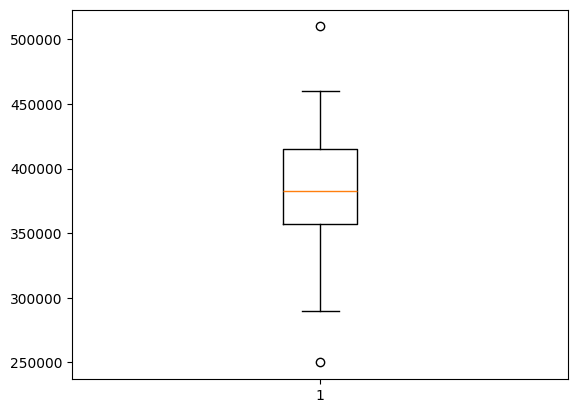

In [20]:
plt.boxplot(df["Price"])
plt.show()

In [21]:
lower_iqr = df.describe()["Price"][["25%"]][0]
upper_iqr = df.describe()["Price"][["75%"]][0]

C:\Users\james\AppData\Local\Temp\ipykernel_20396\42485723.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_iqr = df.describe()["Price"][["25%"]][0]
C:\Users\james\AppData\Local\Temp\ipykernel_20396\42485723.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upper_iqr = df.describe()["Price"][["75%"]][0]


In [22]:
iqr = upper_iqr - lower_iqr
iqr

np.float64(57500.0)

In [23]:
upper_bound = upper_iqr + iqr * 1.5
lower_bound = lower_iqr - iqr * 1.5

In [24]:
upper_bound, lower_bound

(np.float64(501250.0), np.float64(271250.0))

In [25]:
df = df[(df['Price'] <= upper_bound) & (df['Price'] >= lower_bound)]

In [26]:
np.where(df['Price'] > upper_bound, upper_bound, df['Price'])

array([350000., 420000., 382500., 380000., 460000., 290000., 400000.,
       382500.])

Text(0.5, 1.0, 'Price vs Size_sqft')

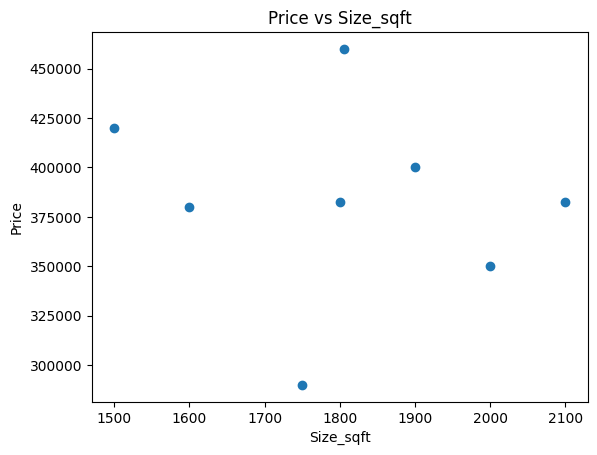

In [27]:
plt.scatter(df["Size_sqft"], y = df["Price"])
plt.xlabel("Size_sqft")
plt.ylabel("Price")
plt.title("Price vs Size_sqft")

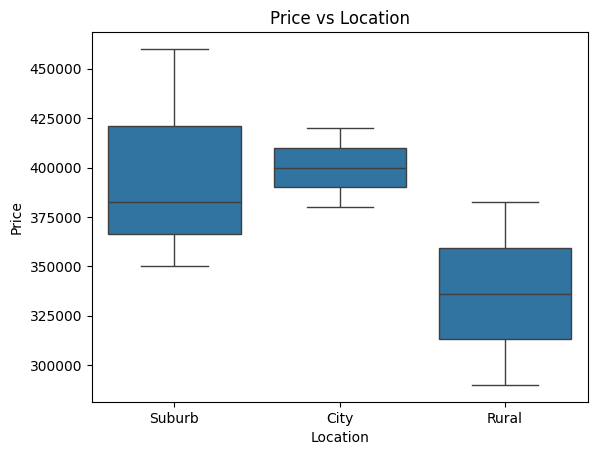

In [32]:
ax = sns.boxplot(x="Location", y="Price", data=df)
ax.set_title("Price vs Location")
plt.show()

In [35]:
df.drop("Location", axis = 1).corr()

,Size_sqft,Bedrooms,Bathrooms,Price
Size_sqft,1.000000,0.912272,0.813272,-0.152571
Bedrooms,0.912272,1.000000,0.834058,-0.153982
Bathrooms,0.813272,0.834058,1.000000,-0.201401
Price,-0.152571,-0.153982,-0.201401,1.000000


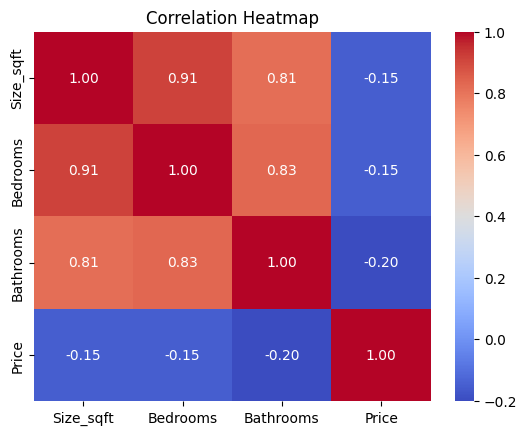

In [40]:
sns.heatmap(df.drop("Location", axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [41]:
df["Price_per_sqft"] = df["Price"] / df["Size_sqft"]

C:\Users\james\AppData\Local\Temp\ipykernel_20396\3914745652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price_per_sqft"] = df["Price"] / df["Size_sqft"]


In [42]:
df["Price_per_sqft"].describe()

count      8.000000
mean     214.769086
std       40.439289
min      165.714286
25%      180.357143
50%      211.513158
75%      241.817308
max      280.000000
Name: Price_per_sqft, dtype: float64

In [ ]:
df["Size_Category"] = df["Size_Category"]

<Axes: xlabel='Price_per_sqft', ylabel='Count'>

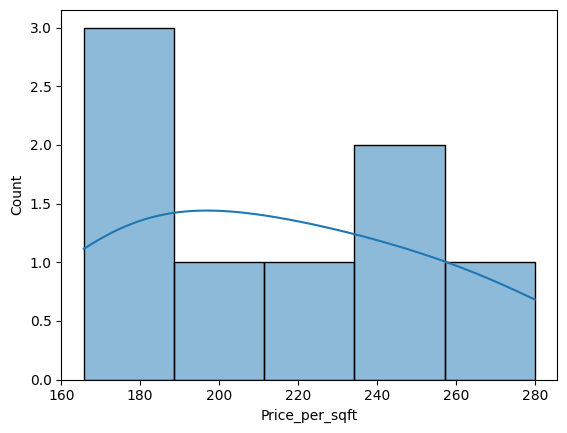

In [44]:
sns.histplot(df["Price_per_sqft"], bins=5, kde=True)

In [45]:
df["Size_Category"] = pd.cut(df["Size_sqft"],  
                             bins=[0, 800, 1500, float("inf")],  
                             labels=["Small", "Medium", "Large"])  

C:\Users\james\AppData\Local\Temp\ipykernel_20396\242734394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Size_Category"] = pd.cut(df["Size_sqft"],


In [46]:
df["Size_Category"].value_counts()

Size_Category
Large     7
Medium    1
Small     0
Name: count, dtype: int64

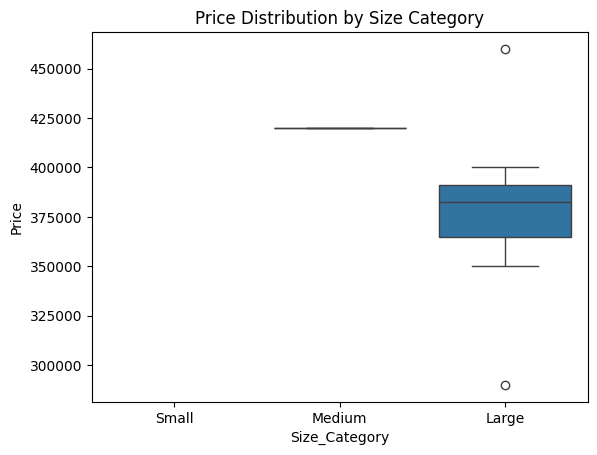

In [47]:
sns.boxplot(x="Size_Category", y="Price", data=df)
plt.title("Price Distribution by Size Category")
plt.show()


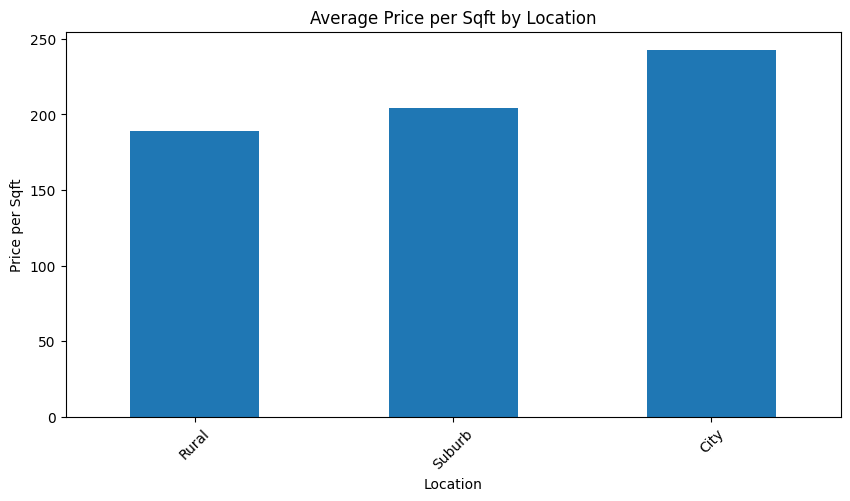

In [48]:
df.groupby("Location")["Price_per_sqft"].mean().sort_values().plot(kind="bar", figsize=(10,5))
plt.title("Average Price per Sqft by Location")
plt.ylabel("Price per Sqft")
plt.xticks(rotation=45)
plt.show()


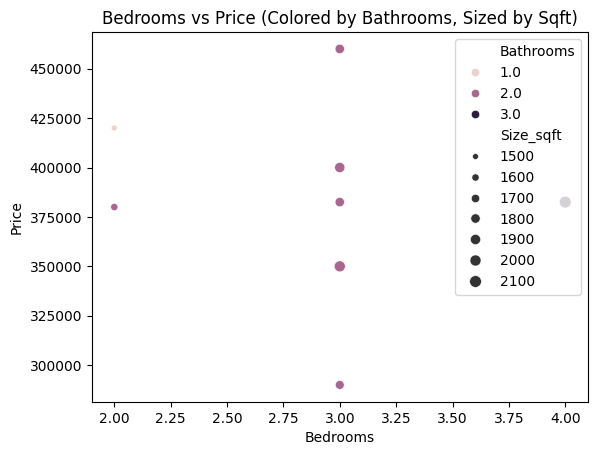

In [49]:
sns.scatterplot(x="Bedrooms", y="Price", hue="Bathrooms", size="Size_sqft", data=df)
plt.title("Bedrooms vs Price (Colored by Bathrooms, Sized by Sqft)")
plt.show()


In [51]:
from scipy import stats

# Group price per sqft by location
groups = [group["Price_per_sqft"].values for _, group in df.groupby("Location")]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_value)


ANOVA F-statistic: 1.344400546967629
ANOVA p-value: 0.34101889730301055


In [52]:
two_bed = df[df["Bedrooms"] == 2]["Price"]
three_plus_bed = df[df["Bedrooms"] >= 3]["Price"]

t_stat, p_value = stats.ttest_ind(two_bed, three_plus_bed, equal_var=False)
print("T-test Statistic:", t_stat)
print("T-test p-value:", p_value)


T-test Statistic: 0.7394624266776825
T-test p-value: 0.5008531640252245
